In [2]:
# To load data into python:
from astropy.io import fits
import numpy as np
#Import DDO51 photometric data
phot = fits.getdata('E:\OneDrive\School\Graduate\Research\Fall 2017\Data\munn_giants.fits',1)

In [3]:
# list of columns
phot.columns

ColDefs(
    name = 'OBJID'; format = 'K'
    name = 'FIELD'; format = '12A'
    name = 'NIGHT'; format = '7A'
    name = 'IMAGE'; format = 'J'
    name = 'CHIP'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'G'; format = 'E'
    name = 'GERR'; format = 'E'
    name = 'R'; format = 'E'
    name = 'RERR'; format = 'E'
    name = 'I'; format = 'E'
    name = 'IERR'; format = 'E'
    name = 'RAWD'; format = 'E'
    name = 'RAWDERR'; format = 'E'
    name = 'D'; format = 'E'
    name = 'DERR'; format = 'E'
    name = 'AG'; format = 'E'
    name = 'AR'; format = 'E'
    name = 'AI'; format = 'E'
    name = 'AD'; format = 'E'
    name = 'GI0CORR'; format = 'E'
    name = 'GD0CORR'; format = 'E'
    name = 'DELTA_GD'; format = 'E'
    name = 'GISHIFT'; format = 'E'
    name = 'GDSHIFT'; format = 'E'
    name = 'MT'; format = 'E'
    name = 'MD'; format = 'E'
    name = 'MT0'; format = 'E'
    name = 'MD0'; format = 'E'
    name = 'MT0CORR'; format = 'E'

In [4]:
# access single column
phot['GI0CORR']

array([ 0.97360134,  1.22792625,  1.12860107, ...,  1.22351265,
        1.63306618,  0.86245537], dtype=float32)

In [5]:
# can also subscript
phot['ra'][100:200]

array([ 358.04972136,  358.2048399 ,  358.37586392,  358.45742414,
        359.20066076,  358.7262268 ,  358.77736903,  358.7565599 ,
        358.85310964,  359.26160692,  359.22984718,  355.35440036,
        355.52289926,  355.79150366,  355.69870385,  355.40451999,
        356.47916247,  356.49202368,  356.43130167,  356.59842069,
        356.51527709,  356.20503655,  356.46199304,  356.52674325,
         12.98465064,   12.86181806,   12.91474645,   13.10978547,
         12.85053446,   12.81987244,   12.9244214 ,   13.07923257,
         12.98006719,   13.32569163,   13.29661398,   13.57170999,
         13.86084497,   20.81778806,   20.85618016,   21.26148061,
         20.83313088,   20.98026892,   21.2118259 ,   22.04372551,
         22.10252294,   26.20957219,   26.51123916,   26.44875687,
         26.32636175,   26.27826327,   26.68629019,   26.83117682,
         26.83048839,   27.37925537,   27.44028974,   27.26943335,
         27.20478666,   27.37308299,   31.64423125,   31.70905

In [6]:
#Import calibration data and define variable spec
spec = fits.getdata('E:\OneDrive\School\Graduate\Research\Fall 2017\Data\Ho2017_Catalog.fits',1)

In [11]:
#Cross-matching
from astropy.coordinates import SkyCoord
from astropy import units as u
c_phot=SkyCoord(ra=phot['ra']*u.degree,dec=phot['dec']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['Dec']*u.degree)
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec < 1)

spec2 = fits.getdata('E:\OneDrive\School\Graduate\Research\Fall 2017\Data\ssppOut-dr10.fits.gz',1)
c_spec2=SkyCoord(ra=spec2['plug_ra']*u.degree,dec=spec2['plug_dec']*u.degree)
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec2) 
good=(d2d.arcsec < 0.5)

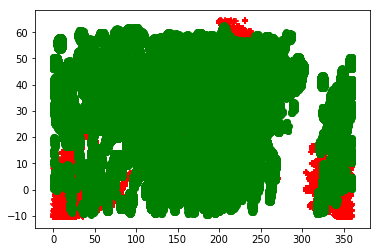

In [12]:
#Plotting
import matplotlib.pyplot as plt
plt.scatter(phot['ra'],phot['dec'],marker='+',c='red')
plt.scatter(spec['RA'],spec['Dec'],marker='o',c='green')
plt.show()